In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
image_dir_path = 'img4/'
image_paths = []
for i in range(3):
    image_paths.append(image_dir_path+'{}.jpg'.format(i+1))
print(image_paths)
images_bgr = []
images_rgb = [] # rgb 로 변환한 이미지
images_show = [] #- 출력용 이미지 별도 보관
resize_shape = (640, 360) # 640x360의 크기로 Resize
for path in image_paths:
  
    img_bgr = cv2.imread(path)    # OpenCV로 이미지를 읽어서
    images_bgr.append(img_bgr)

    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB) # rgb 변환한 이미지
    images_rgb.append(img_rgb)
    
    img_show = img_bgr.copy()

    images_show.append(img_show)

['img4/1.jpg', 'img4/2.jpg', 'img4/3.jpg']


In [3]:
# n by m plotting 함수 
def plotnbym(nrows=3,ncols=2,figsize=(16,12),imgs = images_rgb):
    f, axes = plt.subplots(nrows=nrows,ncols=ncols, figsize = figsize)
    cnt = 0
    for row in axes:
        if ncols ==1:
            row.imshow(imgs[cnt])

            row.set_title('image_{}'.format(cnt))
            
            cnt +=1
        else:
            for col in row:
                col.imshow(imgs[cnt])
                col.set_title('image_{}'.format(cnt))
            
                cnt +=1
            
    plt.show()

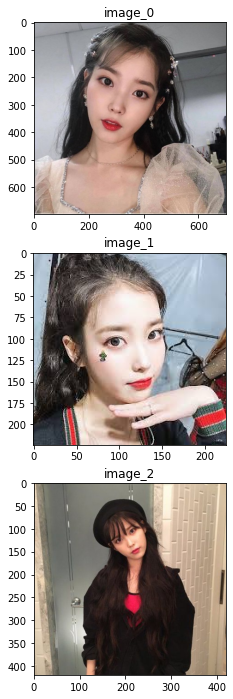

In [4]:

# rgb로 변환한 이미지들 6개 subplot 으로 나눠서 한 번에 보이기
NROWS_3 = 3
NCOLS_2 = 1
FIGSIZE_1612 = (16,12)
plotnbym(nrows =NROWS_3 , ncols =NCOLS_2, figsize = FIGSIZE_1612, imgs = images_rgb)

In [5]:

import dlib
detector_hog = dlib.get_frontal_face_detector()   # dlib을 활용해 hog detector 선언

In [6]:

# detector를 이용하여 얼굴의 bounding box 추출
dlib_rects_list = []
for img_rgb in images_rgb:
    dlib_rects = detector_hog(img_rgb, 1)   #- (image, num of img pyramid)
    dlib_rects_list.append(dlib_rects)

In [7]:
for rects in dlib_rects_list:
    print(rects)

rectangles[[(171, 171) (438, 439)]]
rectangles[[(67, 68) (175, 175)]]
rectangles[[(171, 96) (245, 171)]]


In [8]:
rects_detected_list = []
for idx,rects in enumerate(dlib_rects_list):
    if(not not rects):
        rects_detected_list.append(
            {
                'idx' : idx,
                'rects' : rects
            }
        )

In [9]:

print(len(rects_detected_list))
rects_detected_list

3


[{'idx': 0, 'rects': rectangles[[(171, 171) (438, 439)]]},
 {'idx': 1, 'rects': rectangles[[(67, 68) (175, 175)]]},
 {'idx': 2, 'rects': rectangles[[(171, 96) (245, 171)]]}]

In [10]:
rected_images_show_rgb = []
for idx_rects in rects_detected_list:
    idx = idx_rects['idx']
    dlib_rects = idx_rects['rects']
    for dlib_rect in dlib_rects:
        l = dlib_rect.left()
        t = dlib_rect.top()
        r = dlib_rect.right()
        b = dlib_rect.bottom()
        # cv2.rectangle(images_show[idx], (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)
        print(idx)
        cv2.rectangle(images_show[idx], (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)
    img_show_rgb =  cv2.cvtColor(images_show[idx], cv2.COLOR_BGR2RGB)
    rected_images_show_rgb.append(img_show_rgb)

0
1
2


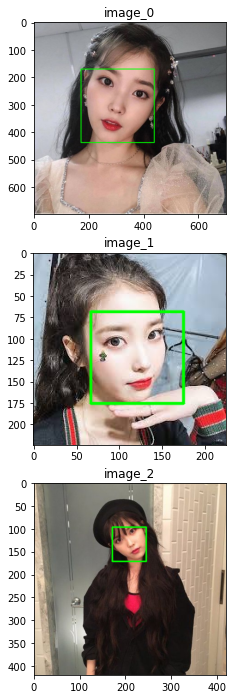

In [11]:
NCOLS_1 = 1
plotnbym(nrows =NROWS_3 , ncols =NCOLS_1, figsize = FIGSIZE_1612, imgs = rected_images_show_rgb)

In [12]:
model_path = 'shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

In [19]:
list_landmarks = []
for idx_rects in rects_detected_list:
    idx = idx_rects['idx']
    rects = idx_rects['rects']
    for rect in rects:
        print(rect)
        points = landmark_predictor(images_show[idx], rect)
        list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        list_landmarks.append(
            {
                'idx' : idx,
                'list_points' : list_points
            }
        )

for idx_points in list_landmarks:
    print(len(idx_points['list_points']))

[(171, 171) (438, 439)]
[(67, 68) (175, 175)]
[(171, 96) (245, 171)]
68
68
68


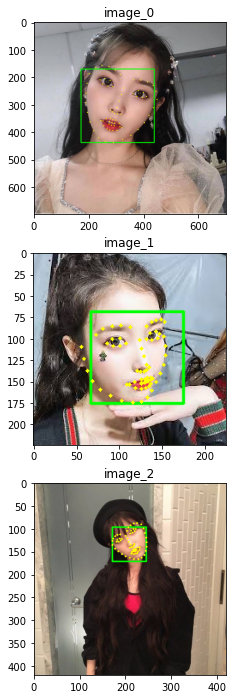

In [14]:
img_show_landmark_list = []
for idx_points in list_landmarks:
    idx = idx_points['idx']
    list_points = idx_points['list_points']
    for point in list_points:      
        cv2.circle(images_show[idx], point, 2, (0, 255, 255), -1) # yellow
    img_show_rgb = cv2.cvtColor(images_show[idx], cv2.COLOR_BGR2RGB)
    img_show_landmark_list.append(img_show_rgb)

plotnbym(nrows=NROWS_3,ncols=NCOLS_1,figsize=FIGSIZE_1612, imgs=img_show_landmark_list)

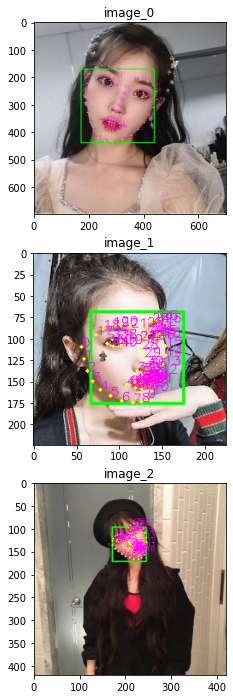

In [15]:
img_show_landmark_list = []
for idx_points in list_landmarks:
    idx = idx_points['idx']
    list_points = idx_points['list_points']
    i = 0
    for point in list_points:      
        cv2.putText(images_show[idx], str(i), point, cv2.FONT_ITALIC, 0.5, (255, 0, 255)) # yellow
        i = i+1
       # print(point[1])
    img_show_rgb = cv2.cvtColor(images_show[idx], cv2.COLOR_BGR2RGB)
    img_show_landmark_list.append(img_show_rgb)

plotnbym(nrows=NROWS_3,ncols=NCOLS_1,figsize=FIGSIZE_1612, imgs=img_show_landmark_list)

In [16]:
len(list_landmarks[0]['list_points'])

68